In [17]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn import preprocessing
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

numimg = 0

In [18]:
import pickle


pickle_in_database = open("databasefoto.p","rb")
databasefoto = pickle.load(pickle_in_database)

pickle_in_queries = open("queriesfoto.p","rb")
queriesfoto = pickle.load(pickle_in_queries)

In [19]:
import pickle


pickle_in_database2 = open("database.p","rb")
x_database = pickle.load(pickle_in_database2)

pickle_in_queries2 = open("queries.p","rb")
x_queries = pickle.load(pickle_in_queries2)

In [26]:
x_databasenorm=preprocessing.normalize(x_database)
x_queriesnorm=preprocessing.normalize(x_queries)

In [40]:
x_mult=np.matmul(x_queriesnorm,np.ndarray.transpose(x_databasenorm))

In [43]:
ranks = np.argsort(x_mult, axis=1)[:,::-1]

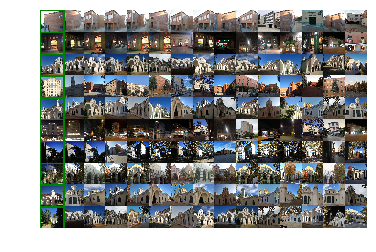

In [29]:
# get the original images for visualization
x_database_images = databasefoto
x_queries_images = queriesfoto

h,w = (224, 224)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 40 # it will show results from query #'offset' to #offset+10
for q in range(10):
    ranks_q = ranks[q*(offset+1),:]
    for i in range(15):
        new_image.paste( Image.fromarray(x_database_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
    ima_q = Image.fromarray(x_queries_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=15, fill='green')

    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [30]:
new_image.save('Cercavisual_kaggle.jpg')

In [35]:
pickle_out_ranks_k = open("ranks_kaggle.p", "wb")
pickle.dump(ranks, pickle_out_ranks_k)
pickle_out_ranks_k.close()

In [37]:
import csv

row1 = ["Query","RetrievedDocuments"]
with open("kaggle_fc2.csv","wb") as myfile:
    wr = csv.writer (myfile, quoting =csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(1673):
        wr.writerow(ranks[z])
        

In [38]:
import csv

row1 = ["Query","RetrievedDocuments"]
with open("kaggle_fc2_.csv","wb") as myfile:
    wr = csv.writer (myfile, quoting =csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(1673):
        wr.writerow(x_mult[z])